In [18]:
# Step 1: Import Libraries
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam


In [2]:
# Step 2: Load and Preprocess the Data
train_dir = r'D:\lung_dataSet\lung\Train'
val_dir = r'D:\lung_dataSet\lung\Val'
test_dir = r'D:\lung_dataSet\lung\Test'

# Image data generator with augmentation for training data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Image data generator for validation and test data (without augmentation)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Generate batches of image data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
    
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)
print("Data generators are created")

Found 11250 images belonging to 3 classes.
Found 1875 images belonging to 3 classes.
Found 1875 images belonging to 3 classes.
Data generators are created


In [3]:
num_train_samples = len(train_generator.filenames)//t calc otal no.of training sample
# Batch size
batch_size = 32

# Steps per epoch
steps_per_epoch = num_train_samples // batch_size

In [4]:
# Step 3: Build the CNN Model
model = Sequential([
    Input(shape=(150, 150, 3)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')  # 3 classes: adenocarcinoma, benign, squamous_carcinoma
])

In [5]:
# Step 4: Compile and Train the Model
model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',//loss function//cost function
    metrics=['accuracy']
)
#model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      18,940,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │           1,539 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,035,203 (72.61 MB)

 Trainable params: 19,035,203 (72.61 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    validation_data=val_generator,
    validation_steps=val_generator.samples // val_generator.batch_size,
    epochs=10
)


Epoch 1/10


C:\Users\K Abhinaya Vamsi\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


351/351 ━━━━━━━━━━━━━━━━━━━━ 423s 1s/step - accuracy: 0.7412 - loss: 0.5374 - val_accuracy: 0.8750 - val_loss: 0.2907
Epoch 2/10
  1/351 ━━━━━━━━━━━━━━━━━━━━ 2:00 344ms/step - accuracy: 0.8438 - loss: 0.3796

C:\Users\K Abhinaya Vamsi\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8438 - loss: 0.3796 - val_accuracy: 0.8947 - val_loss: 0.2825
Epoch 3/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 330s 925ms/step - accuracy: 0.8690 - loss: 0.3184 - val_accuracy: 0.8992 - val_loss: 0.2450
Epoch 4/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 0s 245us/step - accuracy: 0.8438 - loss: 0.3600 - val_accuracy: 1.0000 - val_loss: 0.1533
Epoch 5/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 248s 697ms/step - accuracy: 0.8924 - loss: 0.2602 - val_accuracy: 0.9192 - val_loss: 0.2238
Epoch 6/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 0s 336us/step - accuracy: 0.9375 - loss: 0.1821 - val_accuracy: 0.9474 - val_loss: 0.2335
Epoch 7/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 1302s 4s/step - accuracy: 0.8957 - loss: 0.2477 - val_accuracy: 0.9084 - val_loss: 0.2243
Epoch 8/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 725us/step - accuracy: 0.8750 - loss: 0.2680 - val_accuracy: 1.0000 - val_loss: 0.1655
Epoch 9/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 377s 1s/step - accuracy: 0.9096 - loss: 0.2220 - val_accura

In [7]:
#test accuracy
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Accuracy: {test_accuracy:.2f}')

59/59 ━━━━━━━━━━━━━━━━━━━━ 48s 814ms/step - accuracy: 0.9338 - loss: 0.1780
Test Accuracy: 0.93


In [8]:
# Save the model
model.save('lung_cancer_model.keras')

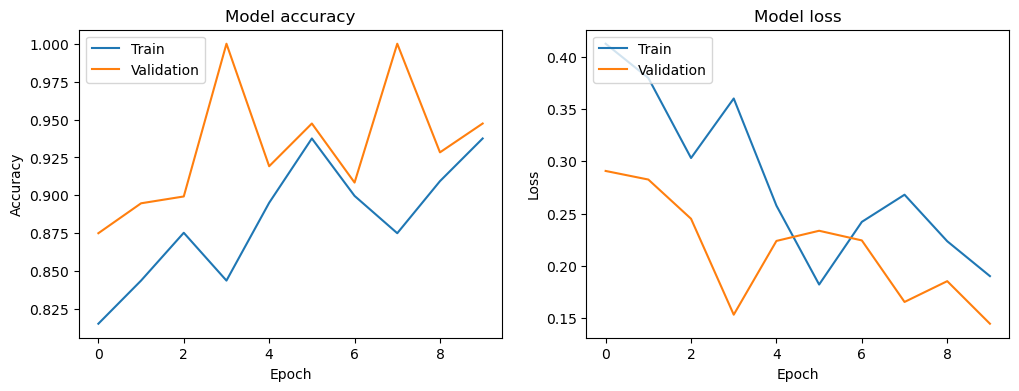

In [9]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [25]:
# Function to load and preprocess the image
from keras.preprocessing import image
def load_and_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(150, 150))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0
    return img_array

# Predict on a new image
img_path = r'D:\lung_dataSet\lung\Test\benign\lungn4398.jpeg'  # Replace with the path to your image
img_array = load_and_preprocess_image(img_path)
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions, axis=1)
confidence_score = np.max(predictions) 
print("predictions are:",predictions)

# Define a confidence threshold
confidence_threshold = 0.999  # Adjust this threshold as needed

class_labels = {0: 'adenocarcinoma', 1: 'benign', 2: 'squamous_carcinoma'}

if confidence_score < confidence_threshold:
    print("The image does not belong to any of the three classes.")
else:
    print(f'Predicted class: {class_labels[predicted_class[0]]} with confidence score: {confidence_score:.2f}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step
predictions are: [[1.0432062e-06 9.9999893e-01 4.9521552e-13]]
Predicted class: benign with confidence score: 1.00
